# Pt. II Pandas Example


## Link to NCEI: https://www.ncdc.noaa.gov/cdo-web/search

In this part of the tutorial (second part to the [pandas tutorial](https://github.com/sjcavazos/meteorology/blob/main/pandas/pandas-ex.ipynb)), we will read in a CSV file that contains daily weather data. In this case, we will be investigating air temperature data from **The University of the Incarnate Word, San Antonio, Texas, Station ID: GHCND:USC00417947**.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

uiw_weather = pd.read_csv('uiw-T-2020-example.csv') #Located in relative path
uiw_weather.shape

(336, 6)

Convert the data column to datetime objects.

In [4]:
uiw_weather['DATE'] = pd.to_datetime(uiw_weather['DATE'])
uiw_weather['DATE'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
331    12
332    12
333    12
334    12
335    12
Name: DATE, Length: 336, dtype: int64

Set the index to the date of observation.

In [5]:
uiw_weather.set_index('DATE', inplace=True)

**Grouping** is one of the most powerful and useful features of `pandas`. From the "10 minutes to Pandas" page: By "group by" we are referring to a process involving one or more of the following steps:
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

<AxesSubplot:xlabel='DATE'>

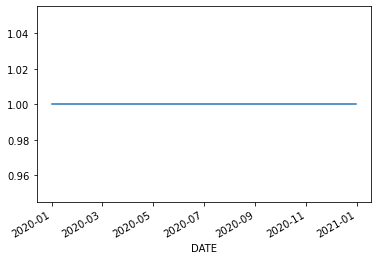

In [6]:
uiw_weather.groupby('DATE').count()['TMAX'].plot()

The above plot takes all of the rows with the same value for "DATE", and then applies the "count" function to them. As we can see, the UIW weather station had no breaks in data collection for "TMAX".

Had there been any NaN values, refer to the original tutorial by [Dr. McCray](https://github.com/mccrayc/tutorials/blob/master/3_pandas/Python_Workshop_Pandas_29_March_2019.ipynb) to learn how to remove them from out dataset.

Let's calculate the average "TMAX" for the year 2020.

In [7]:
uiw_weather.mean(axis="index") #Gives the column average

/tmp/ipykernel_7001/3138785877.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  uiw_weather.mean(axis="index") #Gives the column average


TMAX    82.318452
TMIN    58.020833
TOBS    56.416667
dtype: float64

In [8]:
uiw_weather["TMAX"].mean()

82.31845238095238

In [10]:
uiw_weather.TMAX.describe()

count    336.000000
mean      82.318452
std       13.318030
min       45.000000
25%       73.000000
50%       86.000000
75%       92.000000
max      107.000000
Name: TMAX, dtype: float64

In [11]:
uiw_weather[uiw_weather.TMAX > 100]

,STATION,NAME,TMAX,TMIN,TOBS
DATE,,,,,
2020-07-11,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",101,78,NaN
2020-07-12,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",107,77,NaN
2020-07-13,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",101,77,NaN
2020-07-14,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",105,76,NaN
2020-07-15,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",103,76,NaN
2020-08-15,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",103,77,NaN
2020-08-16,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",102,77,NaN
2020-08-17,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",101,75,NaN
2020-08-20,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",101,68,NaN


Plot the maximum and minimum temperatures for the entire year.

Text(0, 0.5, 'Temperature (deg F)')

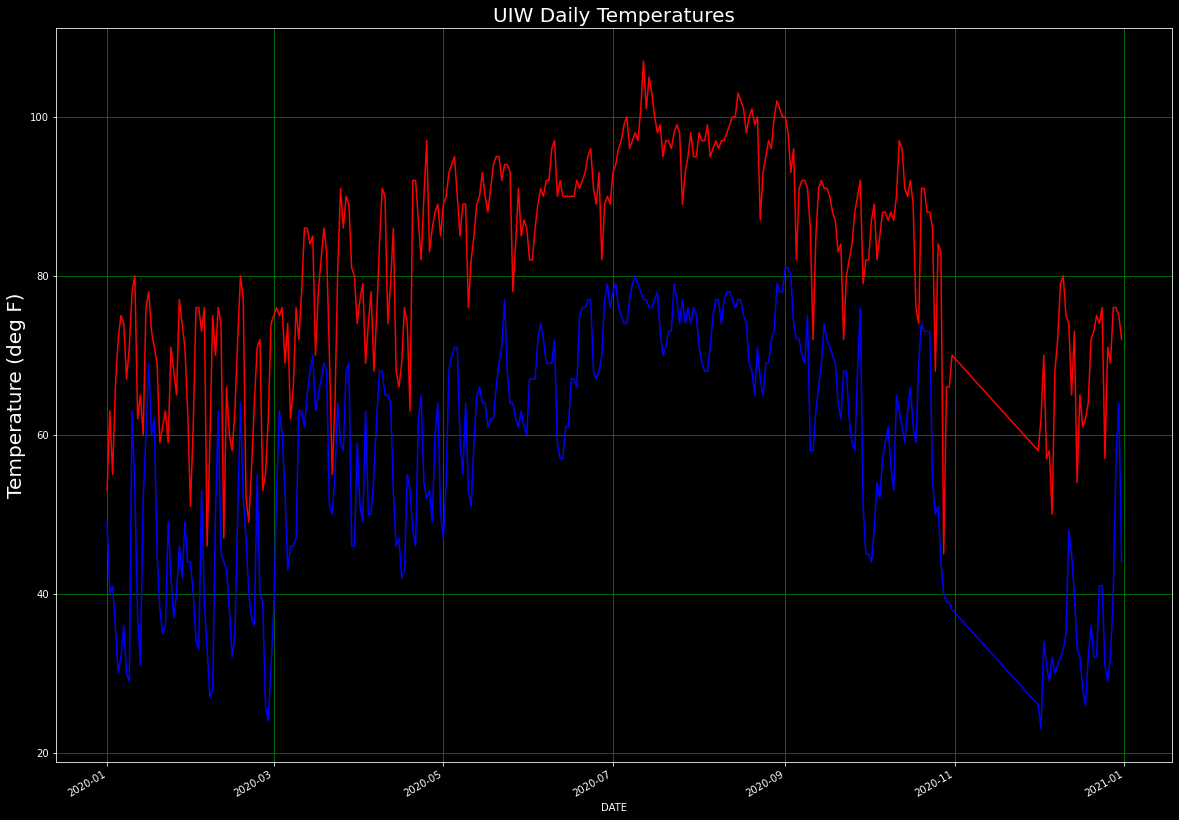

In [27]:
from matplotlib import style

style.use('dark_background')

plt.figure(figsize=[20,15])
uiw_weather['TMAX'].plot(c='r', label="Daily Max Temps")
uiw_weather['TMIN'].plot(c='b', label="Daily Min Temps")
plt.grid(c='g')
plt.title('UIW Daily Temperatures', fontsize=20)
plt.ylabel('Temperature (deg F)', fontsize=20)

Taking a closer look into the month of February

In [30]:
feb_wx = uiw_weather[31:60]
feb_wx

,STATION,NAME,TMAX,TMIN,TOBS
DATE,,,,,
2020-02-01,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",61,40,40.0
2020-02-02,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",76,34,NaN
2020-02-03,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",76,33,58.0
2020-02-04,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",73,53,64.0
2020-02-05,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",76,39,40.0
2020-02-06,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",46,33,33.0
2020-02-07,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",59,27,NaN
2020-02-08,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",75,28,NaN
2020-02-09,USC00417947,"SAN ANTONIO INCARNATE WORD, TX US",70,50,NaN


Text(0, 0.5, 'Temperature (deg F)')

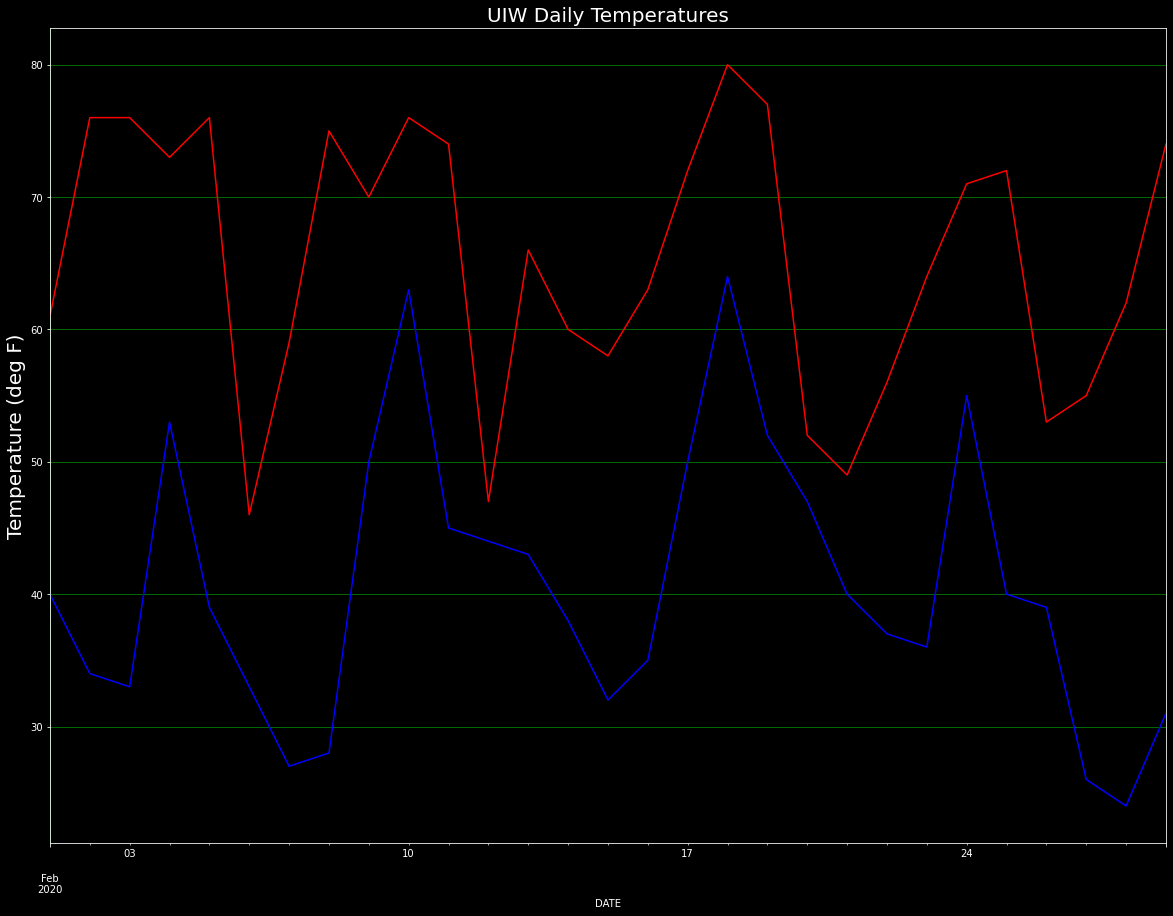

In [32]:
plt.figure(figsize=[20,15])
feb_wx['TMAX'].plot(c='r', label="Daily Max Temps")
feb_wx['TMIN'].plot(c='b', label="Daily Min Temps")
plt.grid(c='g')
plt.title('February Daily Temperatures', fontsize=20)
plt.ylabel('Temperature (deg F)', fontsize=20)